<h1> Python </h1>

<h3>1. 데이터 준비, overlog.gg 데이터 가져오기</h3>

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd`

In [2]:
def getoverlog(number):
    url = "http://overlog.gg/leaderboards/global/rank/" +str(number)
    f = urllib.request.urlopen(url)
    overlog = f.read() .decode("utf8")
    f.close()
    soup = BeautifulSoup(overlog, "lxml")

    ranking = list(ranking.get_text().replace('\n','') for ranking in soup.find_all("td", "ContentCell ContentCell-Rank"))
    country = list(country.get_text().replace('\n','') for country in soup.find_all("td", "ContentCell ContentCell-Platform"))
    player = list(player.get_text() for player in soup.select("td > a > b"))
    lv = list(lv.get_text().replace('Lv. ','') for lv in soup.select("td > a > em"))
    point = list(point.get_text().replace('\n','').replace(' ','') for point in soup.find_all("td","ContentCell ContentCell-SkillRating"))
    killdeath = list(kd.get_text().split(":")[0] for kd in soup.select("td > b"))
    winratio = list(winratio.get_text().replace('\n','').replace('%','') for winratio in soup.find_all("div","WinRatio"))
    playtime  =list(playtime.get_text().replace('\n','').replace('hours','').replace(' ','') for playtime in soup.find_all("td","ContentCell ContentCell-PlayTime"))
    
    overlog = pd.DataFrame({'Ranking':ranking, 'Country' : country, 'Player':player, 'Lv':lv, 'Point':point, 'K/D':killdeath, 'Winratio':winratio, 'Playtime':playtime})
    return(overlog)

In [4]:
high = getoverlog(1)
middle = getoverlog(1001)
low = getoverlog(10001)

In [5]:
high.head()

,Country,K/D,Lv,Player,Playtime,Point,Ranking,Winratio
0,PC-KR,6.29,406,EVERMORE,8,5000,1,96
1,PC-KR,3.45,76,boss,31,5000,2,77
2,PC-KR,3.48,53,BOSS,25,4916,3,74
3,PC-EU,3.31,195,SoOn,29,4900,4,77
4,PC-EU,3.74,151,Zebbosai,16,4860,5,79


In [6]:
high.to_csv("high.csv", sep=',')
middle.to_csv("middle.csv", sep=',')
low.to_csv("low.csv", sep=',')

<h1> R </h1>

<h3>2. 분석</h3>
<li>T-test</li>
<li>ANOVA</li>
<li>카이제곱</li>
<li>단순회귀</li>

In [1]:
#install.packages("repr")
library(repr)

In [2]:
#csv 파일 읽기
high  <-  read.csv("high.csv")
middle  <-  read.csv("middle.csv")
low  <-  read.csv("low.csv")

In [3]:
str(high)

'data.frame':	100 obs. of  9 variables:
 $ X       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Country : Factor w/ 3 levels "PC-EU","PC-KR",..: 2 2 2 1 1 3 1 2 1 2 ...
 $ K.D     : num  6.29 3.45 3.48 3.31 3.74 4.96 3 3.6 3.22 3.76 ...
 $ Lv      : int  406 76 53 195 151 298 171 491 161 297 ...
 $ Player  : Factor w/ 97 levels "AFLagerMan","Agilities",..: 21 8 10 71 84 72 39 74 86 75 ...
 $ Playtime: int  8 31 25 29 16 6 11 23 11 16 ...
 $ Point   : int  5000 5000 4916 4900 4860 4836 4833 4831 4817 4809 ...
 $ Ranking : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Winratio: int  96 77 74 77 79 83 78 77 71 80 ...


<h4>t-test의 유형 <br>

A. 2-Sample t-test: 서로 다른 두개의 그룹 간의 평균 비교<br>
(예: 남자와 여자 간 소득의 차이 비교)<br>

B. Paired t-test : 하나의 집단에 대한 비교<br>
(예: 과외를 하기 전과 후의 반 학생들의 성적 변화)<br>

> '고수'구간과 '중수'구간의 킬데스의 평균에 차이가 있을까?  ->  2-Sample t-test

In [4]:
# 정규성, 등분산성, 독립성? 확인

In [5]:
# 정규성 검정 (N>=30)
shapiro.test(high$K.D)
shapiro.test(middle$K.D)
# 귀무가설 : 데이터가 정규분포를 따른다.
# 대립가설 : 데이터가 정규분포를 따르지 않는다.


	Shapiro-Wilk normality test

data:  high$K.D
W = 0.9496, p-value = 0.000781



	Shapiro-Wilk normality test

data:  middle$K.D
W = 0.94745, p-value = 0.0005654


[1] 1 2

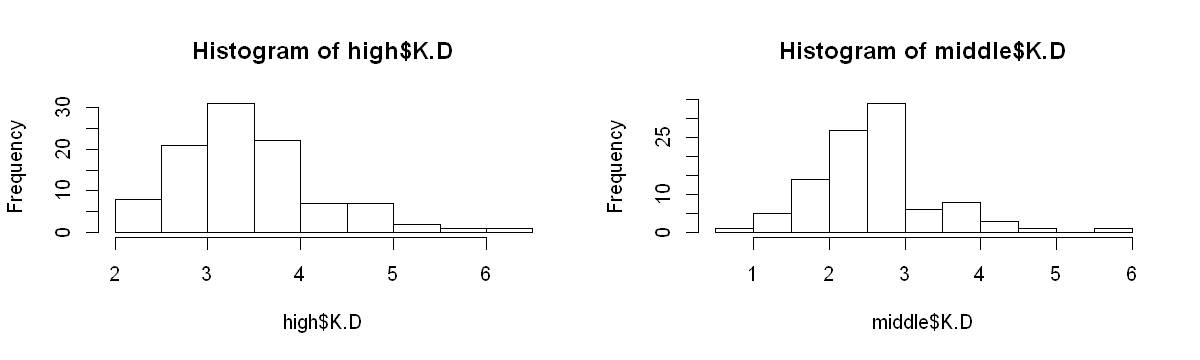

In [6]:
split.screen(c(1,2))
options(repr.plot.width = 10)
options(repr.plot.height = 3)
screen(1)
hist(high$K.D)
screen(2)
hist(middle$K.D)
close.screen(all=T)

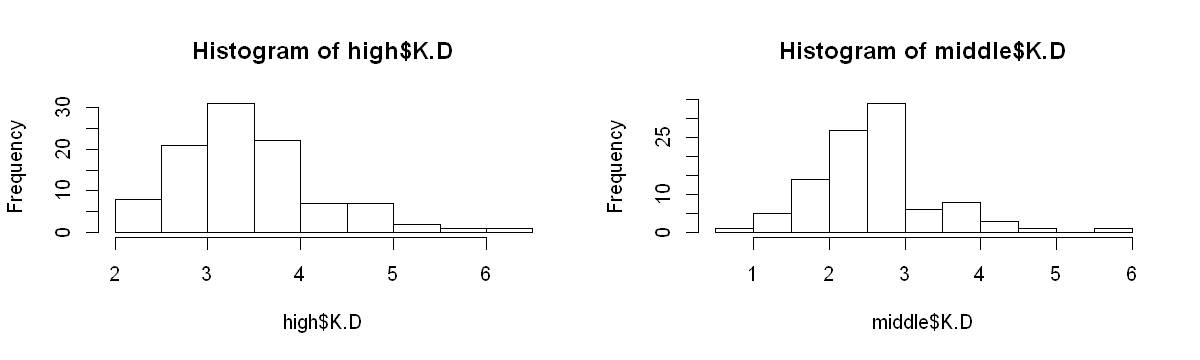

In [7]:
par( mfrow = c( 1, 2 ) )
options(repr.plot.width = 10)
options(repr.plot.height = 3)

hist(high$K.D)
hist(middle$K.D)

In [8]:
# 등분산성 검정
var.test(high$K.D, middle$K.D)
# 귀무가설 : 두 집단의 분산이 다르다
# 대립가설 : 두 집단의 분산이 같다.


	F test to compare two variances

data:  high$K.D and middle$K.D
F = 1.0224, num df = 99, denom df = 99, p-value = 0.9123
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6879395 1.5195833
sample estimates:
ratio of variances 
          1.022439 


In [9]:
#등분산 O
t.test(high$K.D, middle$K.D, pair=F, var.equal = F, conf.level=0.95)
#등분산 X
#t.test(high$K.D, middle$K.D, pair=F, var.equal = T, conf.level=0.95)
# 귀무가설 : 두 집단의 평균이 같다.
# 대립가설 : 두 집단의 평균이 다르다.


	Welch Two Sample t-test

data:  high$K.D and middle$K.D
t = 7.8473, df = 197.98, p-value = 2.606e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6376687 1.0657313
sample estimates:
mean of x mean of y 
   3.4509    2.5992 


In [10]:
#정규성 만족 X 시 사용
wilcox.test(high$K.D,middle$K.D)


	Wilcoxon rank sum test with continuity correction

data:  high$K.D and middle$K.D
W = 8108.5, p-value = 3.094e-14
alternative hypothesis: true location shift is not equal to 0


In [11]:
# http://acpi.tistory.com/30
# http://www.dodomira.com/2016/04/02/r%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-t-test/
# http://www.statmethods.net/stats/ttest.html

<h4>일원배치 분산분석(One-way ANOVA) <br>

독립된 세 집단 이상의 평균을 비교하고자 할 때 사용하는 분석 방법<br>
aov, bartlett.test 함수 사용<br>
그룹 변수를 factor로 변환 후 사용<br> 
</h4>

In [12]:
# ANOVA 를 위한 데이터
high$group  <- 1
middle$group  <- 2
low$group  <- 3
overlog  <- rbind(high,middle,low)
dim(overlog)
class(overlog$group)
overlog$group  <- factor(overlog$group)
class(overlog$group)

[1] 300  10

[1] "numeric"

[1] "factor"

In [13]:
#오차의 등분산성 검정 bartlett.test
bartlett.test(K.D~group, data=overlog)
# 귀무가설 : 등분산성 만족


	Bartlett test of homogeneity of variances

data:  K.D by group
Bartlett's K-squared = 12.045, df = 2, p-value = 0.002424


In [14]:
#ANOVA 수행
analysis<-aov(K.D~group, data=overlog)
summary(analysis)
# 귀무가설 : m1 = m2 =m3

             Df Sum Sq Mean Sq F value Pr(>F)    
group         2  143.2   71.62   144.1 <2e-16 ***
Residuals   297  147.7    0.50                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [15]:
# 정규성 만족 안할때, Kruskal Wallis Test One Way Anova by Ranks 
kruskal.test(overlog$K.D~overlog$group)


	Kruskal-Wallis rank sum test

data:  overlog$K.D by overlog$group
Kruskal-Wallis chi-squared = 169.23, df = 2, p-value < 2.2e-16


In [31]:
#카이제곱
class(high$K.D)
high$K.D2 = substring(high$K.D,1,1)
high$K.D2 = as.factor(high$K.D2)
class(high$K.D2)
head(high)

[1] "numeric"

[1] "factor"

X,Country,K.D,Lv,Player,Playtime,Point,Ranking,Winratio,group,K.D2
0,PC-KR,6.29,406,EVERMORE,8,5000,1,96,1,6
1,PC-KR,3.45,76,boss,31,5000,2,77,1,3
2,PC-KR,3.48,53,BOSS,25,4916,3,74,1,3
3,PC-EU,3.31,195,SoOn,29,4900,4,77,1,3
4,PC-EU,3.74,151,Zebbosai,16,4860,5,79,1,3
5,PC-US,4.96,298,SPREE,6,4836,6,83,1,4


In [45]:
#install.packages("gmodels")
#install.packages("vcd")
library(gmodels)
library(vcd)
library(grid)
str(high)
attach(high)
CrossTable(Country, K.D2, expected = TRUE, chisq = TRUE) 

'data.frame':	100 obs. of  11 variables:
 $ X       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Country : Factor w/ 3 levels "PC-EU","PC-KR",..: 2 2 2 1 1 3 1 2 1 2 ...
 $ K.D     : num  6.29 3.45 3.48 3.31 3.74 4.96 3 3.6 3.22 3.76 ...
 $ Lv      : int  406 76 53 195 151 298 171 491 161 297 ...
 $ Player  : Factor w/ 97 levels "AFLagerMan","Agilities",..: 21 8 10 71 84 72 39 74 86 75 ...
 $ Playtime: int  8 31 25 29 16 6 11 23 11 16 ...
 $ Point   : int  5000 5000 4916 4900 4860 4836 4833 4831 4817 4809 ...
 $ Ranking : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Winratio: int  96 77 74 77 79 83 78 77 71 80 ...
 $ group   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ K.D2    : Factor w/ 5 levels "2","3","4","5",..: 5 2 2 2 2 3 2 2 2 2 ...


The following objects are masked from high (pos = 3):

    Country, group, K.D, K.D2, Lv, Player, Playtime, Point, Ranking,
    Winratio, X

The following objects are masked from high (pos = 7):

    Country, group, K.D, K.D2, Lv, Player, Playtime, Point, Ranking,
    Winratio, X

Warning message in chisq.test(t, correct = FALSE, ...):
"Chi-squared approximation may be incorrect"


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | K.D2 
     Country |         2 |         3 |         4 |         5 |         6 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
       PC-EU |         7 |        18 |         5 |         0 |         0 |        30 | 
             |     8.100 |    16.500 |     4.200 |     0.900 |     0.300 |           | 
             |     0.149 |     0.136 |     0.152 |     0.900 |     0.300 |           | 
             |     0.233 |     0.600 |     0.167 |     0.000 |     0.000 |     0.300 | 
             |     0.259 |     0.327 |     0.357 |     0.000 |     0.000 |           | 
             |     0.070 |     0.180 |     0.050 |     0.000 |     0.000 |     

In [ ]:
#(효과가 없다는 귀무가설을 기각하고, 효과가 있다(즉 독립이 아니다)는 대립가설 채택)
#http://rfriend.tistory.com/112